In [46]:
import numpy as np 
import pandas as pd

In [47]:
df_y = pd.read_csv('linearY.csv', header=None,sep='\t',names=['valueY'])
df_y.head()

,valueY
0,0.99523
1,0.99007
2,0.99769
3,0.99386
4,0.99508


In [48]:
df_x = pd.read_csv('linearX.csv', header=None,sep='\t',names=['valueX'])
df_x.head()

,valueX
0,9.1
1,8.0
2,9.1
3,8.4
4,6.9


Final Cost Function Value: 1.3131948455078304e-06
Learned Parameters: theta_0 = 0.9963767845458984, theta_1 = 0.0013398688222173943


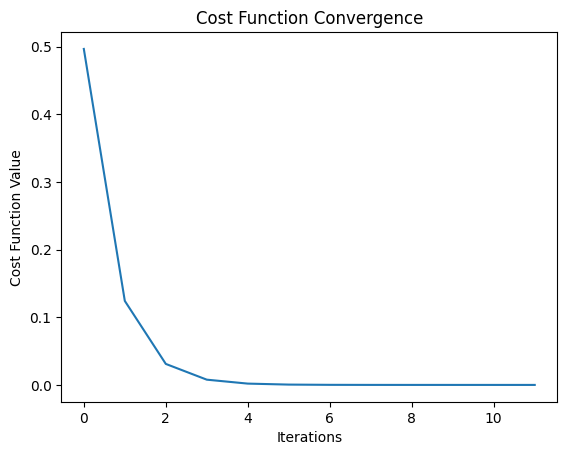

In [ ]:
import matplotlib.pyplot as plt
df_y = pd.read_csv('linearY.csv', header=None, sep='\t', names=['valueY'])
df_x = pd.read_csv('linearX.csv', header=None, sep='\t', names=['valueX'])

# Converting to numpy arrays
x_data = df_x['valueX'].values
y_data = df_y['valueY'].values

# Normalizing data for better gradient descent performance
x_mean = np.mean(x_data)
x_std = np.std(x_data)
x_normalized = (x_data - x_mean) / x_std

# Add a bias term
X = np.c_[np.ones(x_normalized.shape[0]), x_normalized]
y = y_data

# Initialize parameters
theta = np.zeros(2)
alpha = 0.5  # Learning rate
num_iterations = 1000  # Maximum number of iterations
m = len(y)

# Cost function history
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    predictions = X.dot(theta)
    errors = predictions - y
    gradient = (1/m) * X.T.dot(errors)
    theta -= alpha * gradient
    
    # Computing the cost function
    cost = (1/(2*m)) * np.sum(errors**2)
    cost_history.append(cost)
    
    # here we are checking for convergence
    if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
        break
print(f"Final Cost Function Value: {cost_history[-1]}")
print(f"Learned Parameters: theta_0 = {theta[0]}, theta_1 = {theta[1]}")
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function Convergence')
plt.show()


# The convergence criteria used:
- Maximum Number of Iterations:
    The algorithm runs for a maximum of 1000 iterations to prevent infinite loops.
- Small Change in Cost Function:
    The algorithm stops early if the absolute difference between the cost function values in consecutive iterations is less than $10^{-6}$.

# Q.The cost function that we are using in this assignment is different than the one we used in class. Can you think of the advantage of averaging the cost?

Ans- 
Averaging the cost function (using MSE instead of SSE) has key advantages:

- Scale Independence – Makes cost values independent of dataset size.
- Stable Learning Rate – Prevents large updates in gradient descent.
- Easier Convergence Monitoring – Keeps cost values manageable for threshold-based stopping.
- Better Comparability – Allows fair comparison across different datasets.
This ensures more efficient and reliable learning. 

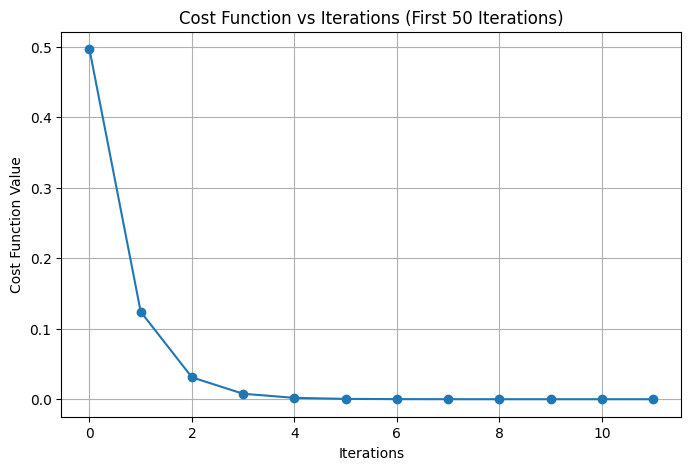

In [50]:
# Plot Cost Function vs Iterations (First 50 iterations)
plt.figure(figsize=(8, 5))
plt.plot(range(min(50, len(cost_history))), cost_history[:50], marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations (First 50 Iterations)')
plt.grid()
plt.show()

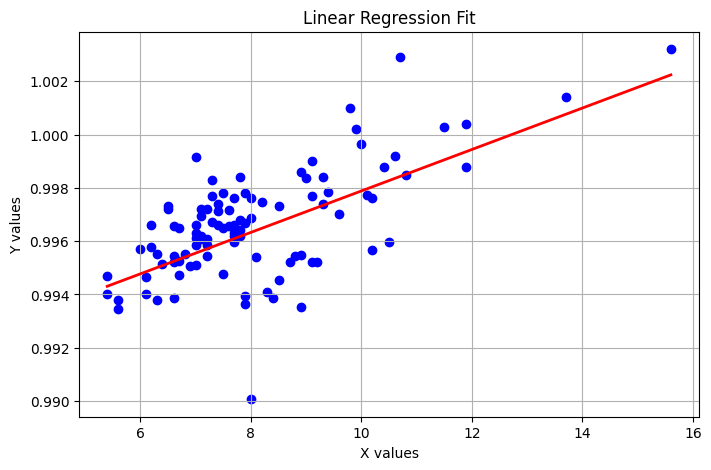

In [51]:
# Convert normalized X back to original scale
x_original = df_x['valueX'].values  # Use original X values
x_range = np.linspace(min(x_original), max(x_original), 100)  # Generate X values for line
x_range_normalized = (x_range - x_mean) / x_std  # Normalize them

# Compute predicted Y values using learned parameters
y_pred = theta[0] + theta[1] * x_range_normalized  # Hypothesis function

# Plot the dataset and the fitted regression line
plt.figure(figsize=(8, 5))
plt.scatter(x_original, y_data, color='blue', label='Original Data')  # Data points
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Fitted Line')  # Regression line
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Fit')
plt.grid()
plt.show()

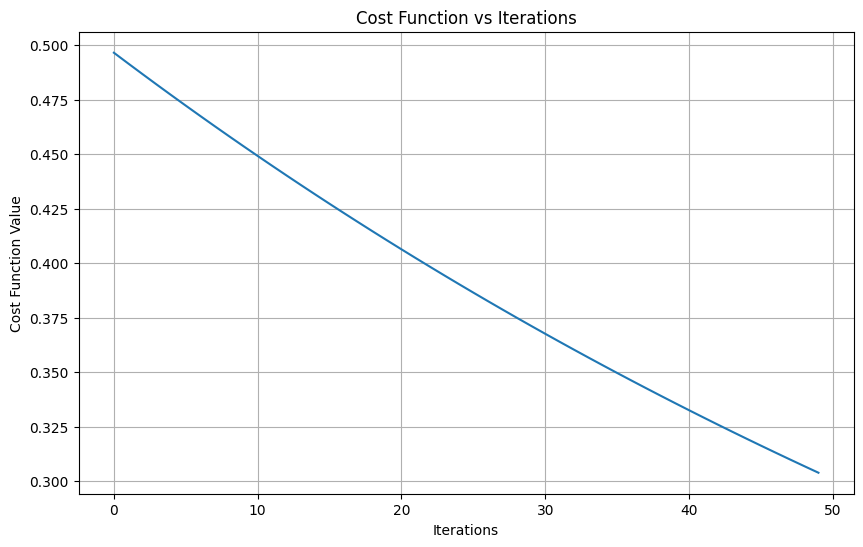

In [52]:
# Function to perform gradient descent and store cost history
def gradient_descent(lr, num_iterations=50):
    theta = np.zeros(2)  # Initialize parameters
    cost_history = []  # Store cost values
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= lr * gradient  # Update rule
        
        # Compute cost function
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
        
        # Check for convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    
    return theta, cost_history

# Learning rates to test
learning_rates = [0.005]
cost_histories = {}

# Train models for each learning rate
for lr in learning_rates:
    _, cost_histories[lr] = gradient_descent(lr)

# Plot Cost Function vs Iterations for Different Learning Rates
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(range(len(cost_histories[lr])), cost_histories[lr], label=f'lr = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations')
plt.grid()
plt.show()

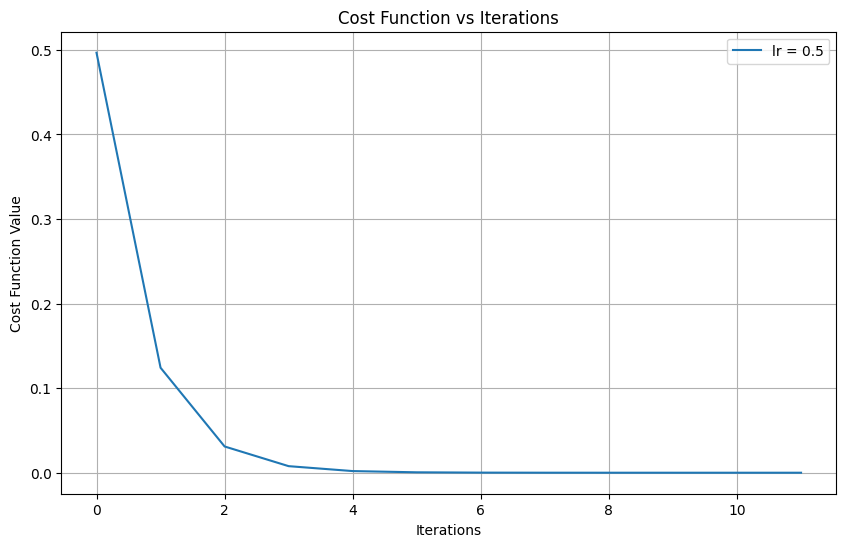

In [53]:
# Function to perform gradient descent and store cost history
def gradient_descent(lr, num_iterations=50):
    theta = np.zeros(2)  # Initialize parameters
    cost_history = []  # Store cost values
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= lr * gradient  # Update rule
        
        # Compute cost function
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
        
        # Check for convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    
    return theta, cost_history

# Learning rates to test
learning_rates = [0.5]
cost_histories = {}

# Train models for each learning rate
for lr in learning_rates:
    _, cost_histories[lr] = gradient_descent(lr)

# Plot Cost Function vs Iterations for Different Learning Rates
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(range(len(cost_histories[lr])), cost_histories[lr], label=f'lr = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations')
plt.legend()
plt.grid()
plt.show()

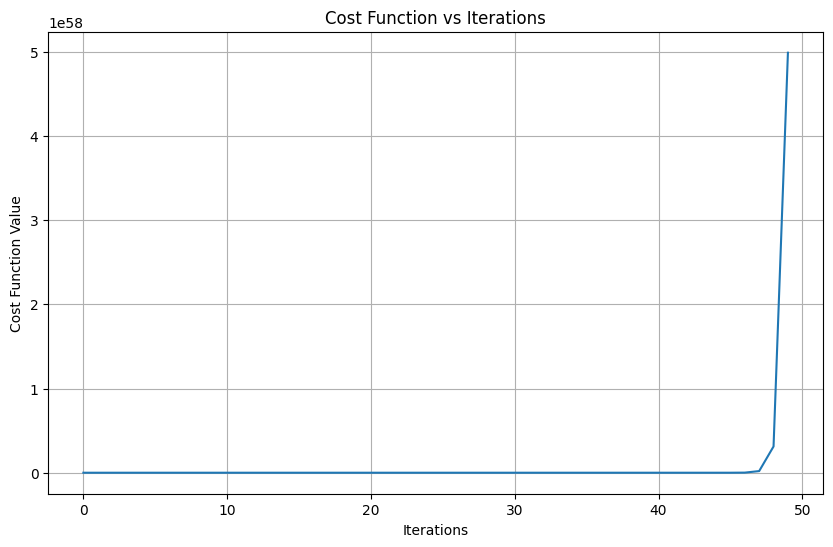

In [54]:
# Function to perform gradient descent and store cost history
def gradient_descent(lr, num_iterations=50):
    theta = np.zeros(2)  # Initialize parameters
    cost_history = []  # Store cost values
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= lr * gradient  # Update rule
        
        # Compute cost function
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
        
        # Check for convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    
    return theta, cost_history

# Learning rates to test
learning_rate = [5]
cost_histories = {}

# Train models for each learning rate
for lr in learning_rate:
    _, cost_histories[lr] = gradient_descent(lr)
plt.figure(figsize=(10, 6))

for lr in learning_rate:
    plt.plot(range(len(cost_histories[lr])), cost_histories[lr], label=f'lr = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations')
plt.grid()
plt.show()

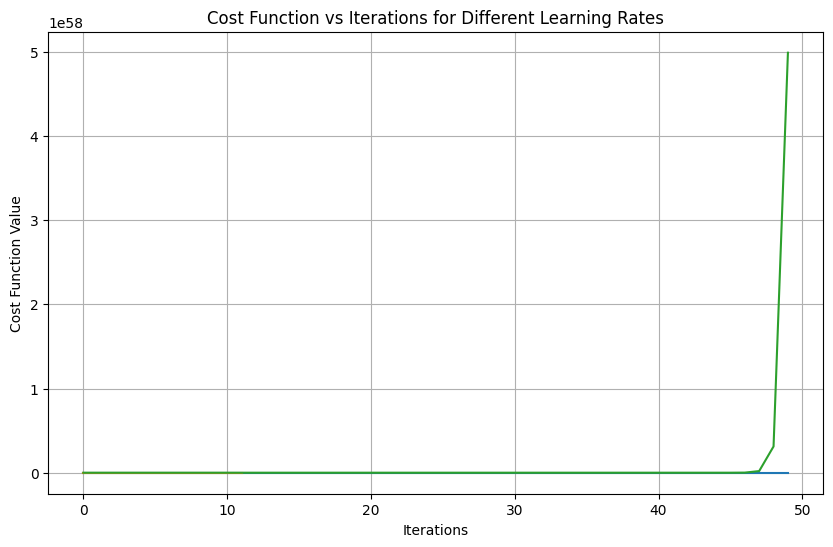

In [55]:
def gradient_descent(lr, num_iterations=50):
    theta = np.zeros(2)
    cost_history = []
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= lr * gradient
        
        # Computing cost function
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
        
        # Check for convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    return theta, cost_history
learning_rates = [0.005,0.5,5]
cost_histories = {}
for lr in learning_rates:
    _, cost_histories[lr] = gradient_descent(lr)
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(range(len(cost_histories[lr])), cost_histories[lr], label=f'lr = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.grid()
plt.show()

For lr = 0.005

- The cost function decreases very slowly.
- The model takes a long time to converge.

For lr = 0.5

- The cost function decreases smoothly and quickly.
- The model converges within a few iterations.

For lr = 5

- The cost function fluctuates or diverges instead of decreasing.
- The model does not converge properly because the updates are too large.

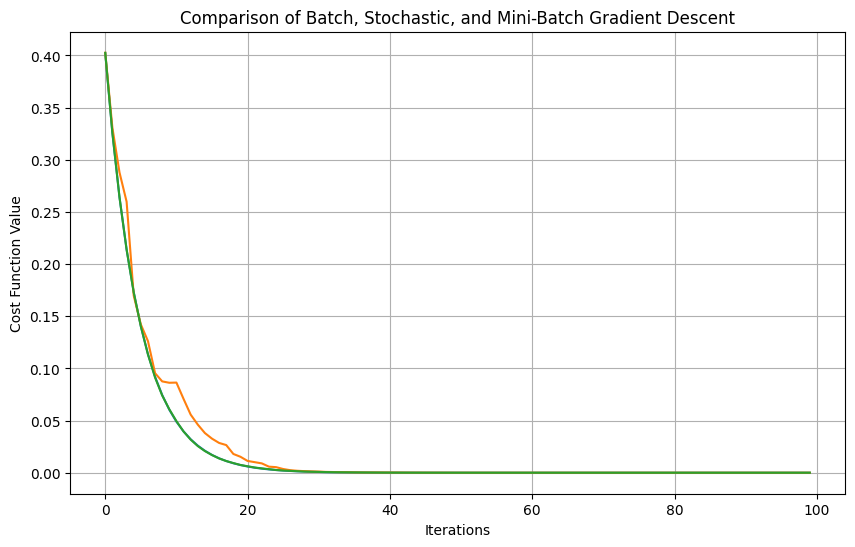

In [ ]:
df_y = pd.read_csv('linearY.csv', header=None, sep='\t', names=['valueY'])
df_x = pd.read_csv('linearX.csv', header=None, sep='\t', names=['valueX'])
x_data = df_x['valueX'].values
y_data = df_y['valueY'].values

x_mean = np.mean(x_data)
x_std = np.std(x_data)
x_normalized = (x_data - x_mean) / x_std

# Add a bias term (x0 = 1)
X = np.c_[np.ones(x_normalized.shape[0]), x_normalized]
y = y_data

# Parameters
alpha = 0.1
num_iterations = 100
m = len(y)

# Function for Gradient Descent Variants
def gradient_descent(method="batch", batch_size=10):
    theta = np.zeros(2)
    cost_history = []
    for i in range(num_iterations):
        if method == "batch":
            predictions = X.dot(theta)
            errors = predictions - y
            gradient = (1/m) * X.T.dot(errors)
        elif method == "stochastic":
            rand_index = np.random.randint(0, m)
            xi = X[rand_index, :].reshape(1, -1)
            yi = y[rand_index]
            predictions = xi.dot(theta)
            errors = predictions - yi
            gradient = xi.T.dot(errors)
        elif method == "mini-batch":
            rand_indices = np.random.choice(m, batch_size, replace=False)
            X_batch = X[rand_indices, :]
            y_batch = y[rand_indices]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradient = (1/batch_size) * X_batch.T.dot(errors)
        theta -= alpha * gradient
        cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
        cost_history.append(cost)
    return theta, cost_history

# Train models using different gradient descent methods
theta_bgd, cost_bgd = gradient_descent(method="batch")
theta_sgd, cost_sgd = gradient_descent(method="stochastic")
theta_mbgd, cost_mbgd = gradient_descent(method="mini-batch", batch_size=10)
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_bgd)), cost_bgd, label="Batch Gradient Descent")
plt.plot(range(len(cost_sgd)), cost_sgd, label="Stochastic Gradient Descent")
plt.plot(range(len(cost_mbgd)), cost_mbgd, label="Mini-Batch Gradient Descent")

plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Comparison of Batch, Stochastic, and Mini-Batch Gradient Descent")
plt.grid()
plt.show()

- For small datasets: Batch Gradient Descent is efficient and stable.
- For large datasets: Mini-Batch Gradient Descent is preferred since it combines stability and speed.
- For online learning (real-time updates): Stochastic Gradient Descent is useful but unstable.